# Nombre de los integrantes:
*   Ángel Andrés Villalobos Irías
*   Alejandro Largaespada
*   Diego Alonso Ulate Jara
*   Andrey Alberto Chacón Gutiérrez


# Tema de investigación:

El tema de investigación propuesto se enfoca en analizar las tasas de mortalidad por cáncer a nivel de cantón en el país. Este estudio busca realizar un constraste entre los distintos cantones con el fin de generar información la cuál contribuya al monitoreo del cáncer en el país.

# Fuente de datos:

Los datos fueron extraídos del Ministerio de Salud Pública.


# Vínculo:
https://www.ministeriodesalud.go.cr/index.php/biblioteca/material-educativo/material-publicado/estadisticas-y-bases-de-datos/estadisticas-y-bases-de-datos-vigilancia-de-la-salud/estadistica-de-cancer-registro-nacional-tumores/mortalidad

# Explicación de las columnas de las tablas:

*   **ID**: Es el identificador de cada una de las filas (este se genera por la
posición de cada fila de datos)
*   **Provincia**: Corresponde a la provincia donde ocurrieron las muertes por casos de cáncer
*   **Cantón**: Corresponde al cantón donde ocurrieron las muertes por casos de cáncer
*   **Localización**: Corresponde a la ubicación del cáncer padecido por cada uno de los individuos
*   **Cantidad**: Corresponde al número de individuos que han padecido el mismo tipo de cáncer, la misma localización, provincia, cantón, año, género.
*   **Tasa**: Corresponde al cociente de dividir el número de acontecimientos sucedidos durante un periodo de tiempo (en este caso 2011) por la población existente durante ese periodo.
*   **Género**: Corresponde al género de cada uno de los pacientes
*   **Año**: Corresponde al año cuando ocurrió la defunción del individuo.
*   **Población**: Es el número de personas que se encuentran en el cantón especificado por cada fila (este dato se toma para calcular la tasa)

# Procesamiento de la información

## 5 Cantones con más fallecimientos por cáncer

In [2]:
import pandas as pd

datos_cancer = pd.read_csv('datos.csv')

fallecimientos_por_canton = datos_cancer.groupby('Canton')['Cantidad'].sum().reset_index()

fallecimientos_por_canton = fallecimientos_por_canton.sort_values(by='Cantidad', ascending=False)

top_5_cantones = fallecimientos_por_canton.head(5)

print("Los 5 cantones con más fallecimientos por cáncer:")
print(top_5_cantones)

Los 5 cantones con más fallecimientos por cáncer:
           Canton  Cantidad
14        CENTRAL       825
19   DESAMPARADOS       158
26     GOICOECHEA       117
56     SAN CARLOS        80
52  PEREZ ZELEDON        77


## 5 Cantones con menos fallecimientos por cáncer

In [4]:
import pandas as pd

datos_cancer = pd.read_csv('datos.csv')

fallecimientos_por_canton = datos_cancer.groupby('Canton')['Cantidad'].sum().reset_index()

fallecimientos_por_canton = fallecimientos_por_canton.sort_values(by='Cantidad', ascending=True)

top_5_cantones = fallecimientos_por_canton.head(5)

print("Los 5 cantones con menos fallecimientos por cáncer:")
print(top_5_cantones)

Los 5 cantones con menos fallecimientos por cáncer:
        Canton  Cantidad
30     GUATUSO         4
37  LOS CHILES         5
20        DOTA         5
31    HOJANCHA         6
58   SAN MATEO         7


## El cantón de cada provincia con más fallecimientos por cualquier tipo de cáncer

In [5]:
import pandas as pd

datos_cancer = pd.read_csv('datos.csv')

fallecimientos_por_prov_canton = datos_cancer.groupby(['Provincia', 'Canton'])['Cantidad'].sum().reset_index()

fallecimientos_por_prov_canton = fallecimientos_por_prov_canton.sort_values(['Provincia', 'Cantidad'], ascending=[True, False])

canton_max_fallecimientos = fallecimientos_por_prov_canton.groupby('Provincia').head(1).reset_index(drop=True)

print("Cantón de cada provincia con más fallecimientos por cáncer:")
print(canton_max_fallecimientos)

Cantón de cada provincia con más fallecimientos por cáncer:
    Provincia      Canton  Cantidad
0    ALAJUELA     CENTRAL       185
1     CARTAGO     CENTRAL       123
2  GUANACASTE  SANTA CRUZ        38
3     HEREDIA     CENTRAL       103
4       LIMON      POCOCI        73
5  PUNTARENAS     CENTRAL        72
6    SAN JOSE     CENTRAL       276


## Cantón en el que cada tipo de cáncer ha causado más muertes

In [6]:
import pandas as pd

# Cargar los datos desde un archivo CSV
datos_cancer = pd.read_csv('datos.csv')

# Agrupar por localización (tipo de cáncer) y cantón, y sumar la cantidad de fallecimientos
fallecimientos_por_localizacion_canton = datos_cancer.groupby(['Localizacion', 'Canton','Provincia'])['Cantidad'].sum().reset_index()

# Ordenar por localización y luego por cantidad de fallecimientos de forma descendente
fallecimientos_por_localizacion_canton = fallecimientos_por_localizacion_canton.sort_values(['Localizacion', 'Cantidad'], ascending=[True, False])

# Obtener el cantón con más fallecimientos por cada tipo de cáncer
canton_max_fallecimientos_por_localizacion = fallecimientos_por_localizacion_canton.groupby('Localizacion').head(1).reset_index(drop=True).sort_values(['Cantidad'], ascending=[False])

# Imprimir los resultados
print("Cantón con más fallecimientos por cada tipo de cáncer:")
print(canton_max_fallecimientos_por_localizacion)

Cantón con más fallecimientos por cada tipo de cáncer:
          Localizacion        Canton Provincia  Cantidad
12            PROSTATA       CENTRAL  SAN JOSE        42
1                COLON       CENTRAL  SAN JOSE        33
4             ESTOMAGO       CENTRAL  SAN JOSE        30
9                 MAMA       CENTRAL  SAN JOSE        28
11            PANCREAS       CENTRAL  SAN JOSE        24
8             LINFOMAS       CENTRAL  SAN JOSE        21
5           ESTOMAGO\t       CENTRAL  SAN JOSE        17
0   BRONQUIOS Y PULMON       CENTRAL  ALAJUELA        16
6               HIGADO       CENTRAL   CARTAGO        15
7            LEUCEMIAS       CENTRAL  ALAJUELA        14
13              PULMON       CENTRAL  SAN JOSE        14
10              OVARIO       CENTRAL  SAN JOSE        11
2     CUELLO DEL UTERO  DESAMPARADOS  SAN JOSE         9
3             ENCEFALO  DESAMPARADOS  SAN JOSE         8
14               RIÑON        POCOCI     LIMON         5


##  Cantón en el que más mujeres han muerto por cáncer

In [7]:
import pandas as pd

datos_cancer = pd.read_csv('datos.csv')

datos_mujeres = datos_cancer[datos_cancer['Genero'] == 'MUJER']

fallecimientos_mujeres_por_canton = datos_mujeres.groupby(['Provincia','Canton'])['Cantidad'].sum().reset_index()

fallecimientos_mujeres_por_canton = fallecimientos_mujeres_por_canton.sort_values(by='Cantidad', ascending=False)

canton_max_fallecimientos_hombres = fallecimientos_mujeres_por_canton.iloc[0]

print("Cantón con más fallecimientos de mujeres por cáncer:")
print(canton_max_fallecimientos_hombres)

Cantón con más fallecimientos de mujeres por cáncer:
Provincia    SAN JOSE
Canton        CENTRAL
Cantidad          120
Name: 64, dtype: object


## Cantón en el que más hombres han muerto por cáncer

In [8]:
import pandas as pd

datos_cancer = pd.read_csv('datos.csv')

datos_mujeres = datos_cancer[datos_cancer['Genero'] == 'HOMBRE']

fallecimientos_mujeres_por_canton = datos_mujeres.groupby(['Provincia','Canton'])['Cantidad'].sum().reset_index()

fallecimientos_mujeres_por_canton = fallecimientos_mujeres_por_canton.sort_values(by='Cantidad', ascending=False)

canton_max_fallecimientos_hombres = fallecimientos_mujeres_por_canton.iloc[0]

print("Cantón con más fallecimientos de mujeres por cáncer:")
print(canton_max_fallecimientos_hombres)

Cantón con más fallecimientos de mujeres por cáncer:
Provincia    SAN JOSE
Canton        CENTRAL
Cantidad          156
Name: 64, dtype: object


# Análisis de los datos

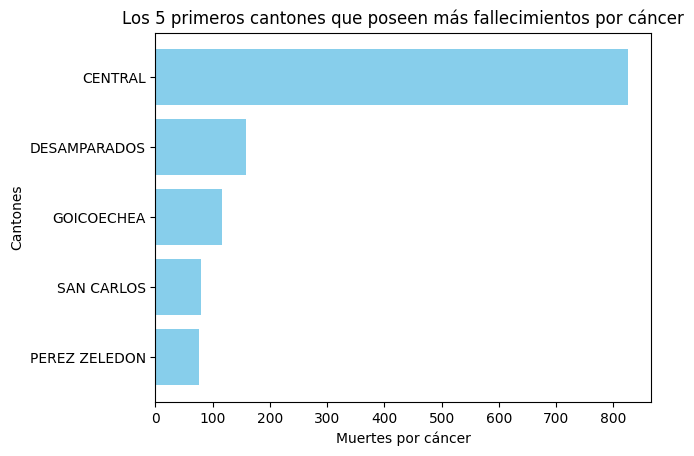

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

datos_cancer = pd.read_csv('datos.csv')
fallecimientos_por_canton=datos_cancer.groupby('Canton')['Cantidad'].sum().reset_index()
fallecimientos_por_canton=fallecimientos_por_canton.sort_values(by='Cantidad', ascending=False)
top_5_cantones=fallecimientos_por_canton.head(5)

plt.barh(top_5_cantones['Canton'], top_5_cantones['Cantidad'], color="skyblue")
plt.title("Los 5 primeros cantones que poseen más fallecimientos por cáncer")
plt.xlabel("Muertes por cáncer")
plt.ylabel("Cantones")
plt.gca().invert_yaxis()  # Invierte el eje y para que el cantón con más fallecimientos esté arriba
plt.show()

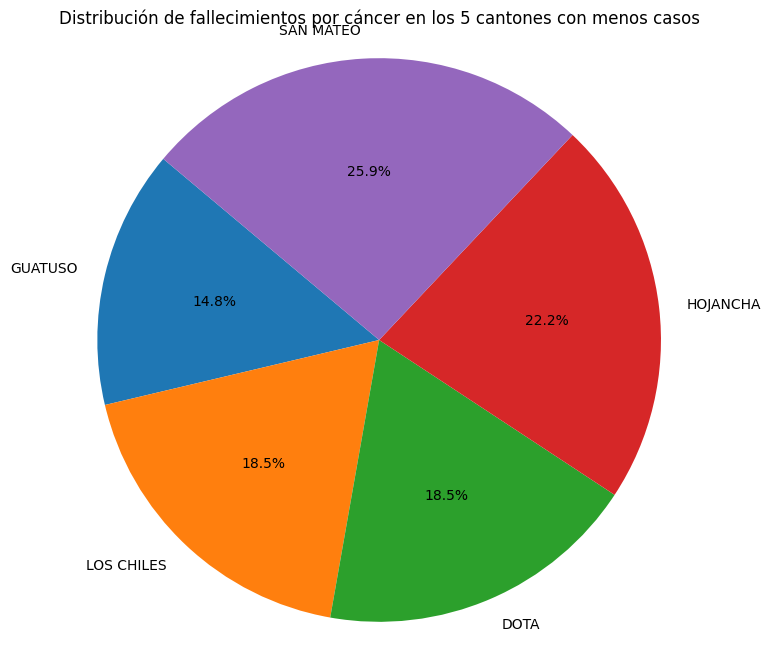

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

datos_cancer = pd.read_csv('datos.csv')
fallecimientos_por_canton = datos_cancer.groupby('Canton')['Cantidad'].sum().reset_index()
fallecimientos_por_canton = fallecimientos_por_canton.sort_values(by='Cantidad', ascending=True)
top_5_cantones = fallecimientos_por_canton.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_cantones['Cantidad'], labels=top_5_cantones['Canton'], autopct='%1.1f%%', startangle=140)
plt.title("Distribución de fallecimientos por cáncer en los 5 cantones con menos casos")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

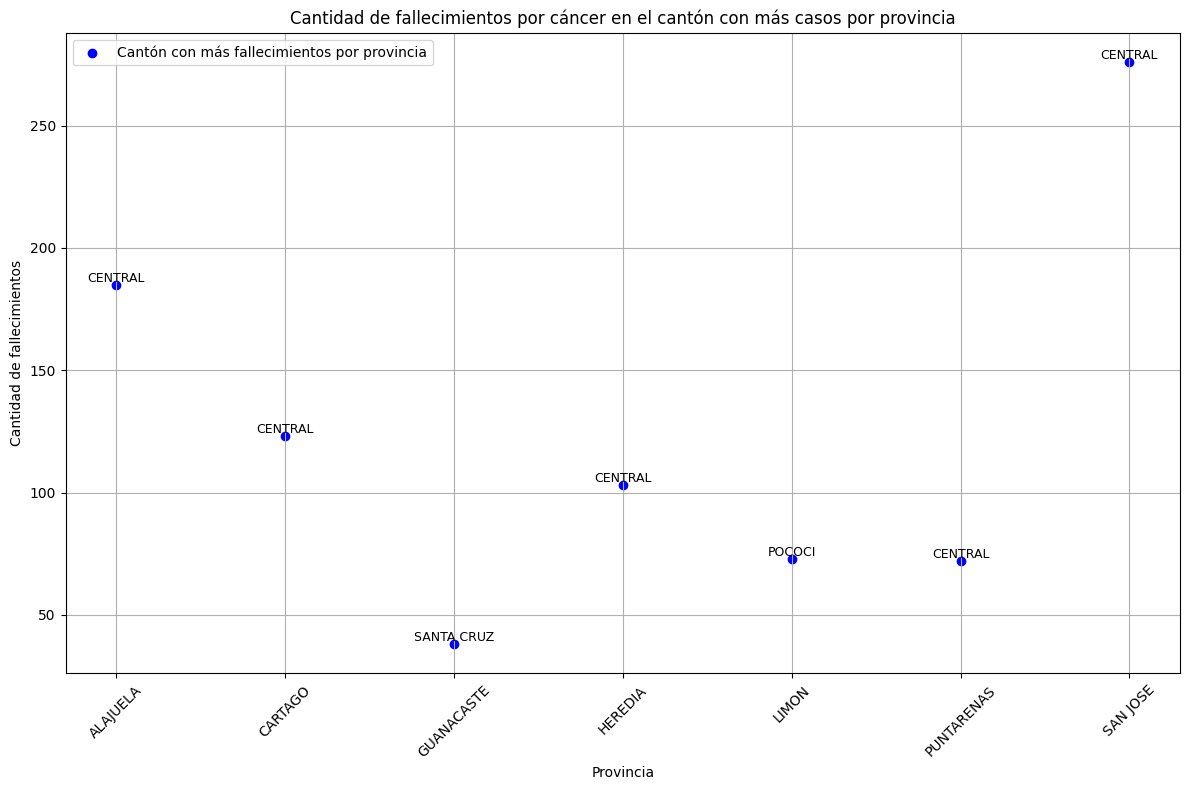

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

datos_cancer = pd.read_csv('datos.csv')

# Agrupar por provincia y cantón y sumar la cantidad de fallecimientos
fallecimientos_por_prov_canton = datos_cancer.groupby(['Provincia','Canton'])['Cantidad'].sum().reset_index()

# Ordenar por provincia y cantidad de fallecimientos
fallecimientos_por_prov_canton = fallecimientos_por_prov_canton.sort_values(['Provincia', 'Cantidad'], ascending=[True, False])

# Seleccionar el cantón con más fallecimientos por provincia
canton_max_fallecimientos = fallecimientos_por_prov_canton.groupby('Provincia').head(1).reset_index(drop=True)

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(canton_max_fallecimientos['Provincia'],
            canton_max_fallecimientos['Cantidad'],
            color='blue',
            label='Cantón con más fallecimientos por provincia')

# Añadir etiquetas de cada punto
for i in range(len(canton_max_fallecimientos)):
    plt.text(canton_max_fallecimientos['Provincia'][i],
             canton_max_fallecimientos['Cantidad'][i],
             canton_max_fallecimientos['Canton'][i],
             fontsize=9,
             ha='center',
             va='bottom')

plt.title('Cantidad de fallecimientos por cáncer en el cantón con más casos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de fallecimientos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.grid(True)  # Mostrar cuadrícula
plt.legend()
plt.tight_layout()
plt.show()
